In [1]:
# Import libraries and dependencies
import numpy as np
import pandas as pd
import random
%matplotlib inline

In [4]:
# Data Generation
# Warning! Boilerplate code
n = 100
x = np.arange(n)
y_stationary = np.random.normal(0, 1, n)

y_nonstationary = [random.random() + (x * .01) for x in range(100)]

# y_nonstationary = []
# for x in range(100):
#     y_nonstationary += [random.random() + x*0.01]
    
df = pd.DataFrame({
    "Stationary": y_stationary,
    "Nonstationary": y_nonstationary
})

In [5]:
df

,Stationary,Nonstationary
0,2.000126,0.041119
1,0.611954,0.630611
2,-0.488027,0.066185
3,0.392442,0.126478
4,-0.615929,0.305857
...,...,...
95,1.040351,1.771019
96,-0.775582,1.443884
97,1.078939,1.954005
98,0.666411,1.716511


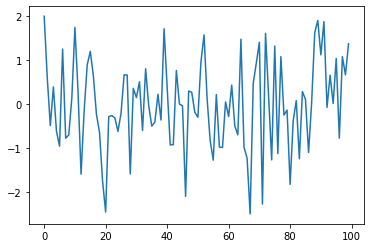

In [6]:
# Plot the stationary data
df.Stationary.plot()

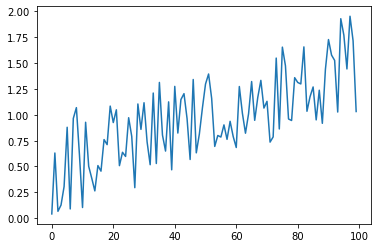

In [7]:
# Plot the non-stationary data
df.Nonstationary.plot()

In [8]:
# Apply the Augmented Dickey-Fuller test to determine if the above is stationary
from statsmodels.tsa.stattools import adfuller
adfuller(df.Stationary)

(-9.299013694782323,
 1.1256403058265028e-15,
 0,
 99,
 {'1%': -3.498198082189098,
  '5%': -2.891208211860468,
  '10%': -2.5825959973472097},
 251.1016444748835)

In [9]:
# Compare the Augmented Dickey-Fuller test to non-stationary data
adfuller(df.Nonstationary)

(-2.6109404395414275,
 0.0907571174150481,
 2,
 97,
 {'1%': -3.4996365338407074,
  '5%': -2.8918307730370025,
  '10%': -2.5829283377617176},
 46.505916816160095)

# Non-Stationary to Stationary Techniques

### Technique 1: Applying a Percent Change

In [9]:
# Convert to stationary data by taking the `pct_change` of the non-stationary data.
df['Returns'] = df.Nonstationary.pct_change()

In [10]:
# Drop the NaNs created by the pct_change function
df = df.dropna()

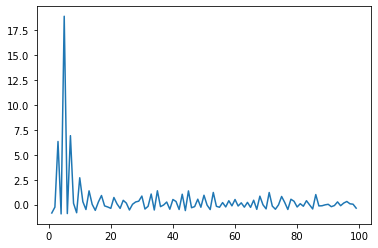

In [11]:
# Plot the returns as a line chart. 
# You should no longer see the upward trend in the data
df.Returns.plot()

### Technique 2: Applying a Diff

In [10]:
# Subtract the upward trend for the non-stationary data using the `diff()` function
df['Diff'] = df.Nonstationary.diff()

In [11]:
# Drop the NaNs created from the diff function
df = df.dropna()

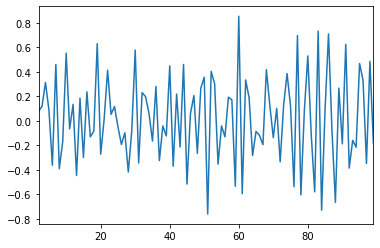

In [12]:
# Plot the data
df.Diff.plot()